<a href="https://colab.research.google.com/github/abdala9512/fake-news-poc/blob/main/pryectoGrado_FakeNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis exploratorio 1

#### Librerias

In [ ]:
# NLKT
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [ ]:
# Modulos nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import PlaintextCorpusReader
from nltk.probability import FreqDist
from nltk.corpus import PlaintextCorpusReader
from nltk.probability import ConditionalFreqDist
# Otras librerias
import pandas as pd
import string
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import chardet
import unidecode
import statistics

In [ ]:
# Stopwords
stop_words = set(stopwords.words(['spanish','english']))

# Importar datos

In [ ]:
# Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Rutas
root_true = '/content/drive/MyDrive/ProyectoGrado/Datos/data_fake_news/Veridicas'
root_fake = '/content/drive/MyDrive/ProyectoGrado/Datos/data_fake_news/Falsas'

In [ ]:
# Noticias falsas
fake_list = PlaintextCorpusReader(root_fake, '.*')
fake_news =list(set(fake_list.fileids()))

# Carga de archivos
fake_docs_raw = []

# lectura 
for file in fake_news:
    with open(root_fake+'/'+file, 'rb') as f:
        result = chardet.detect(f.read())
    encoding = result['encoding']
    
    try:
        fake_list = PlaintextCorpusReader(root_fake, file, encoding=encoding)
        fake_docs_raw.append(fake_list.raw(file))
    except UnicodeDecodeError:
        print(f"Error: unable to decode {file} with encoding {encoding}")

# cantidad de noticias
print("Cantidad de noticias falsas: " , len(fake_docs_raw))

Error: unable to decode F- EL DIÓXIDO DE CLORO NO CURA LA COVID-19 COMO RECOMIENDA LA MODELO COLOMBIANA NATALIA PARÍS.txt with encoding Windows-1254
Error: unable to decode F-No, este pantallazo no prueba que Tribunal de Colombia ordenó suspender el plan de vacunación.txt with encoding Windows-1254
Error: unable to decode F- Escándalo por comercialización de vacuna Pfizer contra COVID sin estudio de contagio es desinformación..txt with encoding Windows-1254
Error: unable to decode F- Mensaje desinforma sobre restricciones en varios países por cuarta ola de COVID-19.txt with encoding Windows-1254
Cantidad de noticias falsas:  292


In [ ]:
# Noticias veridicas
true_list = PlaintextCorpusReader(root_true, '.*')
true_news =list(set(true_list.fileids())) 

# Carga de archivos
true_docs_raw = []

# lectura 
for file in true_news:
    with open(root_true+'/'+file, 'rb') as f:
        result = chardet.detect(f.read())
    encoding = result['encoding']
    
    try:
        true_list = PlaintextCorpusReader(root_true, file, encoding=encoding)
        true_docs_raw.append(true_list.raw(file))
    except UnicodeDecodeError:
        print(f"Error: unable to decode {file} with encoding {encoding}")

# cantidad de noticias
print("Cantidad de noticias veridicas: " , len(true_docs_raw))

Cantidad de noticias veridicas:  237


# Funciones

In [ ]:
def lexical_diversity(text):
    """
    Calcula la diversidad lexica de un texto.
    numero palabras unicas / numero total de palabras
    """
    return len(set(text)) / len(text)

In [ ]:
def lexical_diversity_dist(docs):
  '''
  docs: listado con documentos (textos) a los cuales se les calculara la diversidad lexica
  '''
  diversidades = []
  for text in docs:
    # limpieza
    if isinstance(text, bytes):
        text = text.decode('utf-8')

    # calculo
    tokens = nltk.word_tokenize(text.lower())
    frecuencias = FreqDist(tokens)
    if len(tokens) > 0:
      diversidad_lexica = len(frecuencias) / len(tokens)
      diversidades.append(diversidad_lexica)
  plt.hist(diversidades)
  plt.title("*Distribución de la diversidad léxica*" + " - " "Diversidad lexica media: " + str(round(sum(diversidades) / len(diversidades),4)) + " - " + "Desviación : " + str(round(statistics.stdev(diversidades),4)))
  plt.xlabel("Diversidad léxica")
  plt.ylabel("Frecuencia")
  
plt.show()

In [ ]:
def tokens_text(docs):
  '''
  docs: listado con documentos (textos) a los cuales se les calculara el número de tokens
  '''
  num_tokens = []
  num_tokens_unicos = []
  
  for text in docs:
    # limpieza
    if isinstance(text, bytes):
        text = text.decode('utf-8')

    # calculo
    tokens = nltk.word_tokenize(text.lower())
    tokens = [w for w in tokens if not w in stopwords.words('spanish') and not w in string.punctuation]
    frecuencias = FreqDist(tokens)
    num_tokens.append(len(tokens))
    num_tokens_unicos.append(len(frecuencias))
    
  # Gráfico
  plt.figure(figsize=(10,5))
  plt.hist(num_tokens, alpha=0.5, label='Número de Tokens')
  plt.hist(num_tokens_unicos, alpha=0.5, label='Número de Tokens Únicos')
  plt.title("*Distribución de número de tokens y número de tokens únicos por texto*")
  plt.xlabel("Cantidad de tokens")
  plt.ylabel("Frecuencia")
  plt.legend(loc='upper right')
  plt.show()

In [ ]:
def summary(text, name, k):
    '''
    Resumen descriptivo de cada noticia.

    text: texto a analizar
    name: nombre del texto
    k: longitud para identificar palabras raras
    '''
    num_sent = len(text.sents(name)) #Conteo de oraciones
    num_tkns = len(text.words(name)[:]) #Conteo de palabras

    #Conteo de palabras vacías
    stopwords = nltk.corpus.stopwords.words(['spanish','english'])
    num_empty = len([w for w in text.words(name)[:] if w.lower() in stopwords])

    #Número medio de oraciones por comentario
    if len(text.paras(name)) > 0:
        mean_sent = sum(len(p) for p in text.paras(name)) / float(len(text.paras(name)))
        #Número medio de tokens por oración
        mean_tkns = sum(len(s) for s in text.sents(name)) / float(len(text.sents(name)))
    else: 
        mean_sent = 0
        mean_tkns = 0

    #Palabras comunes y largas
    content = [word.lower() for word in text.words(name)[:] if word.lower() not in stopwords and word.isalpha()]
    fdist1 = FreqDist(content)
    long_words = [w for w in fdist1 if len(w) >= k]

    return("-"*100,
            "Nombre: " + name,
            "Oraciones en la noticia: " + str(num_sent),
            "Tokens en la noticia: " + str(num_tkns),
            "Palabras vacias en la noticia: " + str(num_empty),
            "Número medio de oraciones en la noticia: " + str(mean_sent),
            "Número medio de tokens por oración: " + str(mean_tkns),
            "Total palabras (no vacías, sin signos de puntuación): " + str(len(content)),
            "Top 10 palabras más comunes (sin tener en cuenta las palabras vacías): " + str(fdist1.most_common(10)),
            "Diversidad léxica: " + str(len(content)/num_tkns if num_tkns > 0 else 0),
            "Total palabras con una única aparición: " + str(len(fdist1.hapaxes())),
            "Palabras más largas (>=:" + str(k) + "): " + str(long_words))

In [ ]:
tilde = lambda str: str.translate(str.maketrans("áàäéèëíìïòóöùúüÀÁÄÈÉËÌÍÏÒÓÖÙÚÜ", "aaaeeeiiiooouuuAAAEEEIIIOOOUUU"))

In [ ]:
def tf_idf_prep(text, stemmer=None):
    '''
    text: texto a preparar
    stemmer: metodo de stemming, recibe ps = 'PorterStemmer', ss = 'SnowballStemmer'
    '''
    # 0. Limpiar
    if isinstance(text, bytes):
        text = text.decode('utf-8')
        
    text = text.replace("b'", "").replace("'", "")
    text = re.sub('[¡!¿?\\-»()[]«]', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.replace("•", "") #Caracteres especiales

    # 1. Tokenizar
    tokens = word_tokenize(tilde(text.lower()))

    # 2. Eliminar puntuación
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]

    # 3. Segunda limpieza
    tokens = [token.replace('“', '') for token in tokens]
    tokens = [token.replace('”', '') for token in tokens]
    tokens = [token.strip() for token in tokens]
    tokens = [token for token in tokens if token != ''] 
    tokens = [token for token in tokens if not token.isdigit()]

    # 4. Eliminar stopwords
    stop_words = set(stopwords.words(['spanish', 'english']))
    tokens = [w for w in tokens if not w in stop_words]

    # 5. Stemizar
    if stemmer == 'ps':
        stemmer = PorterStemmer()
    elif stemmer == 'ss':
        stemmer = SnowballStemmer('spanish')
    else:
        return tokens
    tokens_docs_stem = [stemmer.stem(w) for w in tokens]

    return tokens_docs_stem

In [ ]:
def cosine_similarity(a, b):
    nom = np.sum(np.multiply(a, b))
    denom = np.sqrt(np.sum(np.square(a))) * np.sqrt(np.sum(np.square(b)))
    sim = nom / denom
    return sim

# Resumen

#### Fakenews

In [ ]:
[summary(text = fake_list,name = name, k = 13 ) for name in fake_news]

[('----------------------------------------------------------------------------------------------------',
  'Nombre: F-Las afirmaciones falsas del vídeo de Ricardo Delgado Martín en el que dice que el óxido de grafeno es el causante de la COVID-19.txt',
  'Oraciones en la noticia: 80',
  'Tokens en la noticia: 2623',
  'Palabras vacias en la noticia: 1106',
  'Número medio de oraciones en la noticia: 2.6666666666666665',
  'Número medio de tokens por oración: 32.7875',
  'Total palabras (no vacías, sin signos de puntuación): 1140',
  "Top 10 palabras más comunes (sin tener en cuenta las palabras vacías): [('grafeno', 50), ('óxido', 32), ('covid', 26), ('delgado', 16), ('vídeo', 11), ('vacunas', 10), ('mascarillas', 9), ('afirma', 9), ('tecnología', 8), ('material', 8)]",
  'Diversidad léxica: 0.434616850934045',
  'Total palabras con una única aparición: 419',
  "Palabras más largas (>=:13): ['comercialización', 'electromagnéticos', 'acetilcisteína', 'desinformación', 'investigacion

#### Truenews

In [ ]:
[summary(text = true_list,name = name, k = 13 ) for name in true_news]

[('----------------------------------------------------------------------------------------------------',
  'Nombre: V-Flamengo, en alerta máxima por sus contagios de covid-19.txt',
  'Oraciones en la noticia: 18',
  'Tokens en la noticia: 465',
  'Palabras vacias en la noticia: 187',
  'Número medio de oraciones en la noticia: 1.8',
  'Número medio de tokens por oración: 25.833333333333332',
  'Total palabras (no vacías, sin signos de puntuación): 211',
  "Top 10 palabras más comunes (sin tener en cuenta las palabras vacías): [('flamengo', 8), ('palmeiras', 6), ('covid', 4), ('copa', 3), ('libertadores', 3), ('partido', 3), ('jugadores', 3), ('minuto', 3), ('equipo', 2), ('jugar', 2)]",
  'Diversidad léxica: 0.45376344086021503',
  'Total palabras con una única aparición: 140',
  "Palabras más largas (>=:13): ['independiente', 'experimentado', 'confederación', 'centrocampistas']"),
 ('----------------------------------------------------------------------------------------------------

# Procesamiento

### Procesamiento fakenews

In [ ]:
fake_docs_clean = []
fake_vocabulary = []
count = 0
for doc in fake_docs_raw:
  count +=1
  fake_docs_clean.append({'index': (count), 'text': tf_idf_prep(text = doc, stemmer = 'ss')})
  fake_vocabulary +=  tf_idf_prep(text = doc, stemmer = 'ss')

Identificación de la frecuencia de las palabras utilizadas en las noticias falsas del dataset.

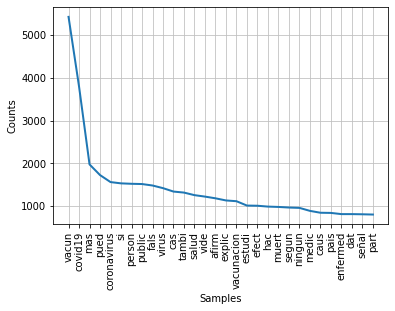

In [ ]:
tokens_all_fake = []

for t in fake_docs_clean:
  tokens_all_fake += t['text']

freq_dist = FreqDist(tokens_all_fake)
freq_dist.plot(30, cumulative=False)
plt.show()

Calculamos la medida de diversidad lexica para cada una de las noticias falsas del conjunto de datos, junto con la media y la desviación estandar de la metrica.

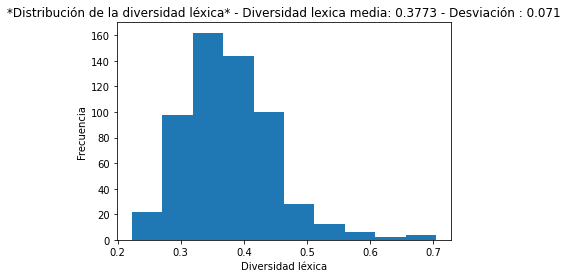

In [ ]:
lexical_diversity_dist(docs=fake_docs_raw)

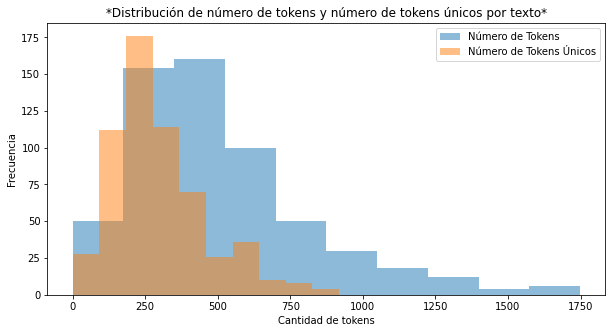

In [ ]:
tokens_text(docs=fake_docs_raw)

In [ ]:
# Hapax
freq_dist = FreqDist(tokens_all_fake)
hapaxes = [] 
for word, freq in freq_dist.items():
    if freq <= 3:
        hapaxes.append(word)
print(hapaxes)

['intoxic', 'ambi', 'bacteric', 'nanomedicin', 'nanomedmol', 'iqm', 'realidad', 'reactividad…', 'espectrocopi', 'cim', 'polimer', 'poliest', 'vastag', 'polipropilen', 'poliestiren', 'margot', 'paulin', 'udel', 'iir', 'shandong', 'shengh', 'uam', 'trasmit', 'traduciri', 'absorcion', 'anchos', 'inalambr', 'ghz', 'segovi', 'talaver', 'etiolog', 'surgir', 'fmi', 'pestañ', 'astrazenac', 'ecc', 'horaci', 'trapassi', 'aldo', 'saracc', 'gaseos', 'objetiv', 'orexigen', 'grelin', 'neuroprotector', 'tumoral', 'ruptur', 'h2o', 'caa', 'prevencioncur', 'elevacion', 'lactat', 'liberari', 'radical', 'mejorari', 'santojanni', 'empir', 'refluj', 'schwarcz', 'mcgill', 'montreal', 'tanis', 'fenton', 'cumming', 'calgary', 'clorhidr', 'rios', 'mineromedicinal', 'pero…', 'mulet', 'enriquec', 'alterari', 'comahu', 'sui', 'generis', 'disuelt', 'hidratacion', 'transpir', 'electrod', 'platin', 'electroliz', 'adit', 'exaltacion', 'provisori', 'identificatori', 'jurisdiccional', 'asj', 'dip', 'ok', 'inscrib', 'afi

### Procesamiento noticias veridicas

In [ ]:
true_docs_clean = []
true_vocabulary = []
count = 0
for doc in true_docs_raw:
  count +=1
  true_docs_clean.append({'index': (count), 'text': tf_idf_prep(text = doc, stemmer = 'ss')})
  true_vocabulary +=  tf_idf_prep(text =doc)

Identificación de la frecuencia de las palabras utilizadas en las noticias veridicas del dataset.

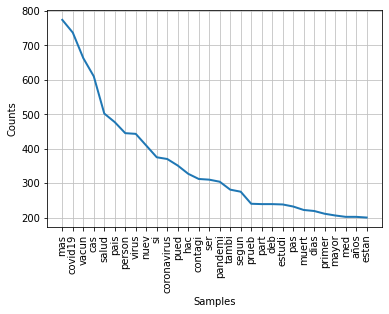

In [ ]:
tokens_all_true = []

for t in true_docs_clean:
  tokens_all_true += t['text']

freq_dist = FreqDist(tokens_all_true)
freq_dist.plot(30, cumulative=False)
plt.show()

Calculamos la medida de diversidad lexica para cada una de las noticias vericas del conjunto de datos, junto con la media y la desviación estandar de la metrica. 

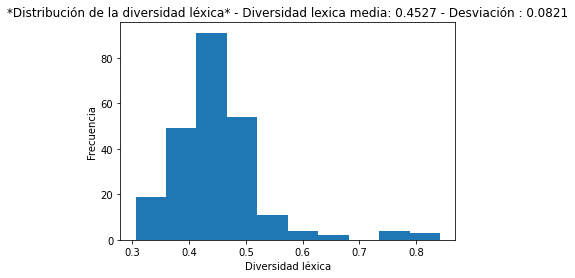

In [ ]:
lexical_diversity_dist(docs=true_docs_raw)

In [ ]:
# Hapax
freq_dist = FreqDist(tokens_all_true)
hapaxes = [] 
for word, freq in freq_dist.items():
    if freq <= 3:
        hapaxes.append(word)
print(hapaxes)

['arranc', 'empat', 'duodecim', 'brasileira', 'juzg', 'janeir', 'junior', 'duel', 'sobrepus', 'decepcion', 'lesion', 'sub20', 'banquill', 'jordi', 'gris', 'domenec', 'torrent', 'disput', 'judicial', 'confederacion', 'cbfy', 'oponi', 'tst', 'inval', 'centrocamp', 'thiag', 'mai', 'gerson', 'giorgi', 'arrascaet', 'delanter', 'intimid', 'patrick', 'paul', 'rebot', 'defensor', 'flamengu', 'mineir', 'venci', 'port', 'alegr', 'abre', 'gratis', 'onu', 'asamble', 'vladim', 'pech', 'volunt', 'kremlin', 'ginebr', 'sancion', 'ilegitim', 'ambit', 'geopolit', 'cooper', 'moderacion', 'despleg', 'misil', 'apost', 'cibersegur', 'aniversari', 'xxi', 'opon', 'goz', 'pil', 'nuclear', 'vencedor', 'ii', 'privilegi', 'interrump', 'chadox1', 'ncov19', 'usa', 'admision', '¿podri', 'supus', 'especific', 'mhra', 'desvel', 'conduct', 'slim', 'except', 'rubric', 'distribuiri', 'lancet', 'pascal', 'soriot', 'interrupcion', 'usain', 'cumpleañ', 'legendari', 'irme', 'esperar', 'confirmacion', 'plusmarqu', 'nationwide

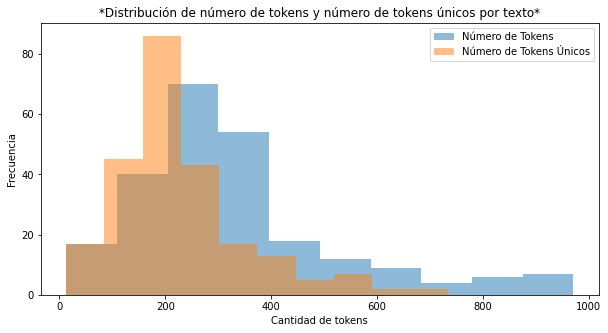

In [ ]:
tokens_text(docs=true_docs_raw)

# Analisis de similitud

In [ ]:
docs = fake_docs_raw + true_docs_raw

In [323]:
count = 0
docs_token_clean = []
vocabulary_tokenz = []

for text in docs:  
  count += 1
  print('-'*50, 'Text raw',count)
  ##
  tokens_docs_stem = tf_idf_prep(text, stemmer='ss')
  ##
  print('\t', tokens_docs_stem, len(tokens_docs_stem))
  docs_token_clean.append({'index': (count), 'text': tokens_docs_stem})
  vocabulary_tokenz += tokens_docs_stem

-------------------------------------------------- Text raw 1
	 ['afirm', 'fals', 'vide', 'ricard', 'delg', 'martin', 'dic', 'oxid', 'grafen', 'causant', 'covid19', 'vacun', 'covid19', 'vacun', 'antigripal', 'hisop', 'prueb', 'pcr', 'contien', 'grafen', 'aemps', 'solicit', 'ces', 'comercializacion', 'unas', 'mascarill', 'quirurg', 'conteni', 'grafen', 'precaucion', 'investig', 'si', 'pued', 'supon', 'riesg', 'oxid', 'grafen', 'causant', 'covid19', 'tecnologi', '5g', 'relacion', 'pandemi', 'exist', 'cur', 'covid19', 'compart', 'vide', 'ricard', 'delg', 'martin', 'fundador', 'quint', 'column', 'canal', 'desinformacion', 'teori', 'conspiracion', 'covid19', 'hac', 'seri', 'afirm', 'fals', 'enfermed', 'vide', 'asegur', 'organ', 'sid', 'intoxic', 'oxid', 'grafen', 'trav', 'mascarill', 'hisop', 'pcr', 'vacun', 'covid19', 'vacun', 'antigripal', 'ciert', 'ambi', 'afirm', 'oxid', 'grafen', 'entrad', 'cuerp', 'vias', 'realid', 'material', 'caus', 'covid19', 'ciert', 'enfermed', 'caus', 'coronavir

In [324]:
cdf = nltk.ConditionalFreqDist()
for num_doc in docs_token_clean:
  print(num_doc)
  condition = num_doc['index']
  for word in num_doc['text']:
    cdf[condition][word] += 1

{'index': 1, 'text': ['afirm', 'fals', 'vide', 'ricard', 'delg', 'martin', 'dic', 'oxid', 'grafen', 'causant', 'covid19', 'vacun', 'covid19', 'vacun', 'antigripal', 'hisop', 'prueb', 'pcr', 'contien', 'grafen', 'aemps', 'solicit', 'ces', 'comercializacion', 'unas', 'mascarill', 'quirurg', 'conteni', 'grafen', 'precaucion', 'investig', 'si', 'pued', 'supon', 'riesg', 'oxid', 'grafen', 'causant', 'covid19', 'tecnologi', '5g', 'relacion', 'pandemi', 'exist', 'cur', 'covid19', 'compart', 'vide', 'ricard', 'delg', 'martin', 'fundador', 'quint', 'column', 'canal', 'desinformacion', 'teori', 'conspiracion', 'covid19', 'hac', 'seri', 'afirm', 'fals', 'enfermed', 'vide', 'asegur', 'organ', 'sid', 'intoxic', 'oxid', 'grafen', 'trav', 'mascarill', 'hisop', 'pcr', 'vacun', 'covid19', 'vacun', 'antigripal', 'ciert', 'ambi', 'afirm', 'oxid', 'grafen', 'entrad', 'cuerp', 'vias', 'realid', 'material', 'caus', 'covid19', 'ciert', 'enfermed', 'caus', 'coronavirus', 'sarscov2', 'adicional', 'delg', 'dic'

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [328]:
df_fdist = pd.DataFrame.from_dict(cdf, orient='index').fillna(0)
tf = df_fdist.divide(np.sum(df_fdist, axis=1), axis=0)
idf = np.log10(len(tf) / df_fdist[df_fdist > 0].count()) 
tfidf = np.multiply(tf, idf.to_frame().T)

<ipython-input-328-70d0344fe0a4>:4: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  tfidf = np.multiply(tf, idf.to_frame().T)


In [354]:
tfidf.sort_values(by = 'index', ascending = True)

afirm      fals      vide    ricard      delg    martin       dic  \
1    0.003665  0.000632  0.005210  0.003397  0.027179  0.002795  0.002113   
434  0.000000  0.001900  0.002136  0.000000  0.000000  0.000000  0.001361   
436  0.000000  0.002093  0.000000  0.000000  0.000000  0.000000  0.002997   
438  0.000000  0.001613  0.000000  0.000000  0.000000  0.000000  0.002310   
440  0.000000  0.001312  0.000000  0.000000  0.000000  0.000000  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
460  0.001509  0.001012  0.000910  0.000000  0.000000  0.000000  0.000290   
405  0.001954  0.001573  0.000000  0.000000  0.000000  0.000000  0.000000   
113  0.001954  0.001573  0.000000  0.000000  0.000000  0.000000  0.000000   
201  0.000524  0.000843  0.000000  0.000000  0.000000  0.000000  0.000604   
493  0.000524  0.000843  0.000000  0.000000  0.000000  0.000000  0.000604   

         oxid   grafen   causant  ...  coronaapp  interfier  cervez  adaptiv  \
1    0.051863  0.07409  0.005418  ...        0.0        0.0     0.0      0.0   
434  0.000000  0.00000  0.000000  ...        0.0        0.0     0.0      0.0   
436  0.000000  0.00000  0.000000  ...        0.0        0.0     0.0      0.0   
438  0.000000  0.00000  0.000000  ...        0.0        0.0     0.0      0.0   
440  0.000000  0.00000  0.003374  ...        0.0        0.0     0.0      0.0   
..        ...      ...       ...  ...        ...        ...     ...      ...   
460  0.000000  0.00000  0.000000  ...        0.0        0.0     0.0      0.0   
405  0.000000  0.00000  0.000000  ...        0.0        0.0     0.0      0.0   
113  0.000000  0.00000  0.000000  ...        0.0        0.0     0.0      0.0   
201  0.000000  0.00000  0.000000  ...        0.0        0.0     0.0      0.0   
493  0.000000  0.00000  0.000000  ...        0.0        0.0     0.0      0.0   

     immun  nlm  consumption  review  need  know  
1      0.0  0.0          0.0     0.0   0.0   0.0  
434    0.0  0.0          0.0     0.0   0.0   0.0  
436    0.0  0.0          0.0     0.0   0.0   0.0  
438    0.0  0.0          0.0     0.0   0.0   0.0  
440    0.0  0.0          0.0     0.0   0.0   0.0  
..     ...  ...          ...     ...   ...   ...  
460    0.0  0.0          0.0     0.0   0.0   0.0  
405    0.0  0.0          0.0     0.0   0.0   0.0  
113    0.0  0.0          0.0     0.0   0.0   0.0  
201    0.0  0.0          0.0     0.0   0.0   0.0  
493    0.0  0.0          0.0     0.0   0.0   0.0  

[815 rows x 12090 columns]

In [360]:
similit=[]
names = fake_news + true_news
for a in range(1,55):
  for b in range(1,55):
    if a<b:
      sim=cosine_similarity(tfidf.loc[[a]].values[0], tfidf.loc[[b]].values[0])
      similit.append({'Texto 1': names[a-1],'Texto 2':names[b-1],'Similitud': sim})

In [361]:
similitud = pd.DataFrame(similit)
similitud = similitud.sort_values(by = 'Similitud', ascending = False)
similitud

Texto 1  \
1369  F- Falso, las vacunas COVID-19 no cambian el c...   
989   F - Hacer gargaras con agua y sal elimina el c...   
362   F- Es falso que vacunas para COVID-19 hayan ca...   
40    F-Las afirmaciones falsas del vídeo de Ricard...   
89    F- Ómicron no es una cepa con lanzamiento pla...   
...                                                 ...   
509   F- La OMS desaconseja el uso de plasma de paci...   
267   F-Es falso que el director ejecutivo de Pfizer...   
270   F-Es falso que el director ejecutivo de Pfizer...   
280   F-Es falso que el director ejecutivo de Pfizer...   
259   F-Es falso que el director ejecutivo de Pfizer...   

                                                Texto 2  Similitud  
1369  F- En España no se ha derogado el uso del tap...   0.628553  
989   F- En España no se ha derogado el uso del tap...   0.408055  
362   F- No hay evidencias de medio centenar de muer...   0.389045  
40    F-Director de farmacéutica Merck no recomendo...   0.381599  
89    F- NINGÚN COLEGIO DE MÉDICOS ES AUTOR DE LA ...   0.352597  
...                                                 ...        ...  
509   F-No, este hombre no es científico ni creó l...   0.005387  
267   F- Las declaraciones de Von der Leyen sobre el...   0.004989  
270   F- EL DIÓXIDO DE CLORO NO CURA LA COVID-19 CO...   0.004937  
280   F- La afirmación falsa del alcalde Quintero s...   0.004232  
259   F- La OMS desaconseja el uso de plasma de paci...   0.002885  

[1431 rows x 3 columns]